In [2]:
# Import packages to use
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'errorbar.capsize': 2})

In [3]:
# Define the file to explore
file='resumenLF0.5.csv'
# Import the data file
df=pd.read_csv(file, engine='python')

In [4]:
df['nu-teo']=np.divide(-1.0,1.0+df['beta'])

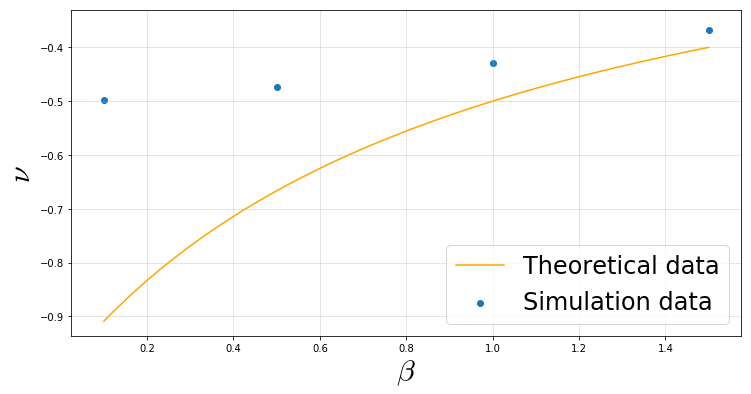

In [5]:
fig,ax=plt.subplots(figsize=(12,6))

ax.scatter(df['beta'],df['nu'],label='Simulation data')

betaplot=np.linspace(min(df['beta']),max(df['beta']),1000)
nuplot=np.divide(-1.0,1.0+betaplot)
ax.plot(betaplot,nuplot,color='orange',label='Theoretical data')

ax.set_xlabel(r'$\beta$',fontsize=30)
ax.set_ylabel(r'$\nu$',fontsize=30)

plt.grid(alpha=0.4)
plt.legend(fontsize=24)
plt.show()
plt.close()